In [1]:
import pandas as pd

## Building Series and DataFrames

In [2]:
series = pd.Series(['BMW', 'Toyota', 'Honda'])
series

0       BMW
1    Toyota
2     Honda
dtype: object

In [3]:
colors = pd.Series(['red', 'blue', 'white'])
colors

0      red
1     blue
2    white
dtype: object

In [4]:
car_data = pd.DataFrame({'Car make': series, 'Color': colors})
car_data

,Car make,Color
0,BMW,red
1,Toyota,blue
2,Honda,white


In [7]:
car_sales = pd.read_csv('../datasets/car_sales.csv')
car_sales.head(2)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"


In [6]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


## Decribing DataFrames

In [11]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [12]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [13]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [14]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [15]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Make             10 non-null object
Colour           10 non-null object
Odometer (KM)    10 non-null int64
Doors            10 non-null int64
Price            10 non-null object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [16]:
car_sales.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [17]:
car_prices = pd.Series(['3000', '1500', '111250'])
car_prices.mean()

10000500037083.334

In [18]:
car_sales['Doors'].sum()

40

In [20]:
len(car_sales)

10

## Selecting data

In [21]:
car_sales.head(2)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"


In [43]:
animals = pd.Series(['cat', 'dog', 'bird', 'panda', 'snake'], 
                    index=[0, 3, 9, 8, 3])
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [46]:
animals.loc[3]

3      dog
3    snake
dtype: object

In [47]:
car_sales.head(2)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"


In [48]:
# loc refers to index (not position)
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [78]:
# converting the price column into float
car_sales['Price'] = car_sales['Price'].apply(lambda x: x.strip('$').replace(',', '')).astype(float)
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)      int64
Doors              int64
Price            float64
dtype: object

In [50]:
# iloc refers to position
animals.iloc[3]

'panda'

In [51]:
animals.iloc[:3]

0     cat
3     dog
9    bird
dtype: object

In [53]:
# filtering 
car_sales[car_sales['Make'] == 'Toyota']

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [55]:
# filtering using multiple conditions
car_sales[(car_sales['Make'] == 'Toyota') & (car_sales['Odometer (KM)'] >= 100000)]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"


In [56]:
pd.crosstab(car_sales['Make'], car_sales['Doors'])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [57]:
car_sales.groupby(['Make']).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<IPython.core.display.Javascript object>


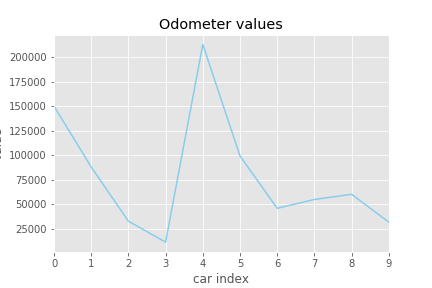

Text(0.5, 1.0, 'Odometer values')

In [83]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

car_sales['Odometer (KM)'].plot(color='skyblue')
plt.xlabel('car index')
plt.ylabel('value')
plt.title('Odometer values')

<IPython.core.display.Javascript object>


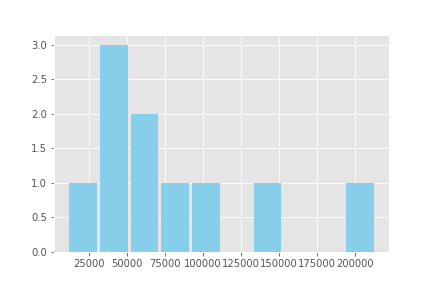

In [79]:
car_sales['Odometer (KM)'].hist(rwidth=0.9, color='skyblue')
plt.show()

<IPython.core.display.Javascript object>


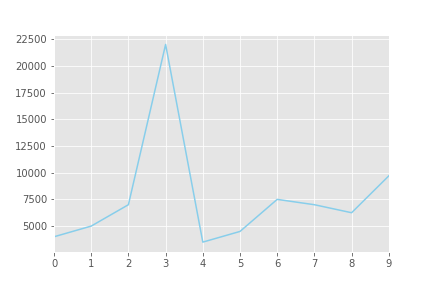

In [82]:
car_sales['Price'].plot(color='skyblue')
plt.show()

## Manipulating data

In [86]:
car_sales['Make'] = car_sales['Make'].str.lower()
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043,4,4000.0
1,honda,Red,87899,4,5000.0
2,toyota,Blue,32549,3,7000.0
3,bmw,Black,11179,5,22000.0
4,nissan,White,213095,4,3500.0


## Imputing missing data (using KNNImputer)

In [213]:
car_sales = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-missing-data.csv')
car_sales

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [214]:
car_sales = car_sales[(car_sales['Make'].notnull()) & (car_sales['Colour'].notnull())]

In [215]:
car_sales['Price'] = car_sales['Price'].fillna('0') \
                                       .apply(lambda x: x.strip('$') \
                                       .replace(',', '')) \
                                       .astype(float) \
                                       .replace(0, np.nan)

/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [216]:
car_sales

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,NaN,3.0,7000.0
3,BMW,Black,11179.0,5.0,22000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,NaN,4.0,4500.0
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN


In [217]:
make_dummies = pd.get_dummies(car_sales['Make']).drop('BMW', axis=1)
colour_dummies = pd.get_dummies(car_sales['Colour']).drop('Black', axis=1)
car_sales_w_dummies = car_sales.join(make_dummies)
car_sales_w_dummies = car_sales_w_dummies.join(colour_dummies)
car_sales_w_dummies = car_sales_w_dummies.drop(['Make', 'Colour'], axis=1)

In [218]:
car_sales_w_dummies

,Odometer,Doors,Price,Honda,Nissan,Toyota,Blue,Green,Red,White
0,150043.0,4.0,4000.0,0,0,1,0,0,0,1
1,87899.0,4.0,5000.0,1,0,0,0,0,1,0
2,NaN,3.0,7000.0,0,0,1,1,0,0,0
3,11179.0,5.0,22000.0,0,0,0,0,0,0,0
4,213095.0,4.0,3500.0,0,1,0,0,0,0,1
5,NaN,4.0,4500.0,0,0,1,0,1,0,0
7,NaN,4.0,NaN,1,0,0,1,0,0,0
8,60000.0,NaN,NaN,0,0,1,0,0,0,1


In [220]:
from sklearn.impute import KNNImputer

X = car_sales_w_dummies.values
imputer = KNNImputer()
X = imputer.fit_transform(X)

In [221]:
car_sales_imputed = car_sales.copy()
car_sales_imputed['Odometer'] = X[:, 0]
car_sales_imputed['Doors'] = X[:, 1]
car_sales_imputed['Price'] = X[:, 2]

In [222]:
car_sales_imputed

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,104443.2,3.0,7000.0
3,BMW,Black,11179.0,5.0,22000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,104443.2,4.0,4500.0
7,Honda,Blue,104443.2,4.0,8300.0
8,Toyota,White,60000.0,4.0,8500.0


## Creating new columns

In [250]:
car_sales = pd.read_csv('../datasets/car_sales.csv')
car_sales['Price'] = car_sales['Price'].apply(lambda x: x.strip('$').replace(',', '')).astype(float)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [251]:
# creating new column from pd.Series
car_sales['Seats'] = pd.Series([5, 5, 5, 5, 5])
car_sales['Seats'] = car_sales['Seats'].fillna(5)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,4000.0,5.0
1,Honda,Red,87899,4,5000.0,5.0
2,Toyota,Blue,32549,3,7000.0,5.0
3,BMW,Black,11179,5,22000.0,5.0
4,Nissan,White,213095,4,3500.0,5.0
5,Toyota,Green,99213,4,4500.0,5.0
6,Honda,Blue,45698,4,7500.0,5.0
7,Honda,Blue,54738,4,7000.0,5.0
8,Toyota,White,60000,4,6250.0,5.0
9,Nissan,White,31600,4,9700.0,5.0


In [252]:
# creating new column from python list (has to be the same length)
fuel_class = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6, 8.7, 3, 4.5]
car_sales['Fuel per 100KM'] = fuel_class
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM
0,Toyota,White,150043,4,4000.0,5.0,7.5
1,Honda,Red,87899,4,5000.0,5.0,9.2
2,Toyota,Blue,32549,3,7000.0,5.0,5.0
3,BMW,Black,11179,5,22000.0,5.0,9.6
4,Nissan,White,213095,4,3500.0,5.0,8.7
5,Toyota,Green,99213,4,4500.0,5.0,4.7
6,Honda,Blue,45698,4,7500.0,5.0,7.6
7,Honda,Blue,54738,4,7000.0,5.0,8.7
8,Toyota,White,60000,4,6250.0,5.0,3.0
9,Nissan,White,31600,4,9700.0,5.0,4.5


In [253]:
# creating new column from another column(s)
car_sales['Total fuel used'] = car_sales['Odometer (KM)'] / 100 * car_sales['Fuel per 100KM']
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265
5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011
6,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206
8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000


In [254]:
# create new column from a single value
car_sales['Number of wheel'] = 4
car_sales['Passed road saftey'] = True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used,Number of wheel,Passed road saftey
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
6,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True


In [255]:
car_sales.dtypes

Make                   object
Colour                 object
Odometer (KM)           int64
Doors                   int64
Price                 float64
Seats                 float64
Fuel per 100KM        float64
Total fuel used       float64
Number of wheel         int64
Passed road saftey       bool
dtype: object

## Sampling 

In [268]:
# shuffling the data
car_sales_shuffled = car_sales.sample(frac=1)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used,Number of wheel,Passed road saftey
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
6,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
8,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
5,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True


In [264]:
# take only 50% of the data (shuffled)
car_sales_shuffled.sample(frac=0.5)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used,Number of wheel,Passed road saftey
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
9,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True


In [269]:
# resetting the index 
car_sales_shuffled = car_sales_shuffled.reset_index(drop=True)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used,Number of wheel,Passed road saftey
0,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
1,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
2,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
3,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
4,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
5,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True
6,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
7,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True
8,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
9,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True


In [271]:
# applying function to a column (turning odometer from KM into miles)
car_sales_shuffled['Odometer (KM)'] = car_sales_shuffled['Odometer (KM)'].apply(lambda x: x / 1.6)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used,Number of wheel,Passed road saftey
0,Nissan,White,133184.375,4,3500.0,5.0,8.7,18539.265,4,True
1,Honda,Blue,28561.250,4,7500.0,5.0,7.6,3473.048,4,True
2,BMW,Black,6986.875,5,22000.0,5.0,9.6,1073.184,4,True
3,Honda,Red,54936.875,4,5000.0,5.0,9.2,8086.708,4,True
4,Toyota,Blue,20343.125,3,7000.0,5.0,5.0,1627.450,4,True
5,Nissan,White,19750.000,4,9700.0,5.0,4.5,1422.000,4,True
6,Honda,Blue,34211.250,4,7000.0,5.0,8.7,4762.206,4,True
7,Toyota,White,37500.000,4,6250.0,5.0,3.0,1800.000,4,True
8,Toyota,White,93776.875,4,4000.0,5.0,7.5,11253.225,4,True
9,Toyota,Green,62008.125,4,4500.0,5.0,4.7,4663.011,4,True
